# Goal of the project
###  1.Analysing the dataset
###  2.Cleaning the dataset
###  3.handling the missing attributes
###  4.Traing and Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_column', None)

df=pd.read_csv('appendicities.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,PsoasSign,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,AppendixWallLayers,Kokarde,TissuePerfusion,SurroundingTissueReaction,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,yes,no,no,negative,yes,no,38.7,13.3,66.0,+,+,no,76.0,no,normal,no,no,aufgehoben,no,hyperperfused,yes,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,yes,yes,yes,negative,yes,no,38.8,14.9,93.2,NaN,NaN,NaN,10.0,no,normal,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,yes,no,no,negative,no,yes,37.2,6.6,55.3,no,no,no,13.0,NaN,normal,no,no,aufgehoben,yes,NaN,no,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,yes,no,no,NaN,no,no,37.0,12.4,57.9,no,no,no,6.0,NaN,normal,local,no,NaN,NaN,NaN,no,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,yes,no,no,positive,no,no,37.2,4.2,50.6,no,no,no,2.0,no,obstipation,no,no,NaN,no,NaN,yes,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,yes,no,no,negative,no,no,38.4,10.3,NaN,no,no,no,1.0,no,diarrhea,no,no,NaN,no,NaN,no,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,yes,yes,yes,positive,no,no,36.8,11.0,82.4,NaN,NaN,NaN,5.0,no,normal,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,yes,yes,yes,NaN,yes,no,37.0,7.5,56.3,NaN,NaN,NaN,1.0,no,normal,no,no,NaN,NaN,NaN,no,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,yes,yes,no,negative,no,no,38.8,9.8,54.5,+,+,++,55.0,no,obstipation,no,no,NaN,NaN,NaN,NaN,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

From the columns we can see there are three types of data and those are int, float and object

Int and float data are numarical, on the other hand object data types are mostly categorical

In [3]:
df.describe()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixDiameter,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry
count,428.000000,430.000000,430.000000,430.000000,430.000000,430.000000,266.000000,429.000000,426.000000,385.000000,424.000000
mean,11.368983,18.976406,148.420930,43.632174,5.723256,4.953488,7.713158,37.589697,12.429343,70.873506,30.688443
std,3.421575,4.295955,19.956526,17.038258,2.142949,1.986592,2.574918,0.990731,5.279408,14.238485,56.652265
min,0.035592,7.827983,47.500000,3.275000,2.000000,1.000000,2.700000,26.900000,2.600000,27.200000,0.000000
25%,9.338809,15.845389,138.000000,31.125000,4.000000,4.000000,6.000000,37.000000,8.400000,59.100000,1.000000
50%,11.529090,18.143691,150.500000,42.000000,6.000000,5.000000,7.300000,37.400000,11.850000,74.900000,7.000000
75%,13.924025,21.244624,162.875000,55.000000,7.000000,6.000000,9.100000,38.200000,15.800000,82.900000,31.250000
max,17.872690,38.156221,190.000000,98.000000,10.000000,10.000000,17.000000,40.200000,33.600000,94.100000,365.000000


Here are some basic statistical describtion of the numarical feature

## Cleaning the data

In [4]:
df.isnull().sum()

Age                             2
BMI                             0
Sex                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixOnSono                  2
AppendixDiameter              164
MigratoryPain                   0
LowerAbdominalPainRight         1
ReboundTenderness               3
CoughingPain                    1
PsoasSign                      37
Nausea                          0
AppetiteLoss                    1
BodyTemp                        1
WBCCount                        4
NeutrophilPerc                 45
KetonesInUrine                123
ErythrocytesInUrine           123
WBCInUrine                    123
CRPEntry                        6
Dysuria                        19
Stool                           6
Peritonitis                     0
FreeFluids                     17
AppendixWallLayers            288
Kokarde                       280
TissuePerfusio

This data contains lots of missing values or Null Attribute. If we convert them into percentage-

In [5]:
df1=df.copy()

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
   
    print(feature, np.round(df1[feature].isnull().mean()*100, 4),  ' % missing values')

Age 0.4651  % missing values
AppendixOnSono 0.4651  % missing values
AppendixDiameter 38.1395  % missing values
ReboundTenderness 0.6977  % missing values
PsoasSign 8.6047  % missing values
WBCCount 0.9302  % missing values
NeutrophilPerc 10.4651  % missing values
KetonesInUrine 28.6047  % missing values
ErythrocytesInUrine 28.6047  % missing values
WBCInUrine 28.6047  % missing values
CRPEntry 1.3953  % missing values
Dysuria 4.4186  % missing values
Stool 1.3953  % missing values
FreeFluids 3.9535  % missing values
AppendixWallLayers 66.9767  % missing values
Kokarde 65.1163  % missing values
TissuePerfusion 87.2093  % missing values
SurroundingTissueReaction 58.1395  % missing values
PathLymphNodes 61.6279  % missing values
MesentricLymphadenitis 67.907  % missing values
BowelWallThick 79.5349  % missing values
Ileus 83.9535  % missing values
FecalImpaction 82.7907  % missing values
Meteorism 75.1163  % missing values
Enteritis 90.4651  % missing values


### We can drop those feature with less then 70% of data

In [7]:
df1.drop(['AppendixWallLayers','Kokarde','TissuePerfusion','SurroundingTissueReaction','PathLymphNodes','MesentricLymphadenitis', 'BowelWallThick','Ileus','FecalImpaction','Meteorism','Enteritis'], axis=1, inplace=True)


In [8]:
df1

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,PsoasSign,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,yes,no,no,negative,yes,no,38.7,13.3,66.0,+,+,no,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,yes,yes,yes,negative,yes,no,38.8,14.9,93.2,NaN,NaN,NaN,10.0,no,normal,no,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,yes,no,no,negative,no,yes,37.2,6.6,55.3,no,no,no,13.0,NaN,normal,no,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,yes,no,no,NaN,no,no,37.0,12.4,57.9,no,no,no,6.0,NaN,normal,local,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,yes,no,no,positive,no,no,37.2,4.2,50.6,no,no,no,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,yes,no,no,negative,no,no,38.4,10.3,NaN,no,no,no,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,yes,yes,yes,positive,no,no,36.8,11.0,82.4,NaN,NaN,NaN,5.0,no,normal,no,no,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,yes,yes,yes,NaN,yes,no,37.0,7.5,56.3,NaN,NaN,NaN,1.0,no,normal,no,no,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,yes,yes,no,negative,no,no,38.8,9.8,54.5,+,+,++,55.0,no,obstipation,no,no,noAppendicitis,conservative,no


### Now we have feature that have at least 70% of data
Still there are lots of missing values in these feature. We will take care of those in the following steps.

## Working with Numerical Features

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df1[numerical_features].head()

Number of numerical variables:  11


,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixDiameter,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry
0,12.531143,16.494601,159.0,41.7,7,5,5.5,38.7,13.3,66.0,76.0
1,12.410678,12.595222,152.0,29.1,8,8,NaN,38.8,14.9,93.2,10.0
2,10.537988,15.991247,133.5,28.5,3,3,6.0,37.2,6.6,55.3,13.0
3,10.425736,16.185025,146.0,34.5,4,3,6.0,37.0,12.4,57.9,6.0
4,13.270363,20.449137,164.0,55.0,2,2,6.5,37.2,4.2,50.6,2.0


In [10]:
# Count unique values

df1[numerical_features].nunique()

Age                           407
BMI                           421
Height                        162
Weight                        208
AlvaradoScore                   9
PediatricAppendicitisScore     10
AppendixDiameter               60
BodyTemp                       43
WBCCount                      173
NeutrophilPerc                258
CRPEntry                      106
dtype: int64

In [11]:
df1[numerical_features].isnull().sum()

Age                             2
BMI                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixDiameter              164
BodyTemp                        1
WBCCount                        4
NeutrophilPerc                 45
CRPEntry                        6
dtype: int64

### There are some value missing in these numarical feature. We can fill this value considering their distribution
Plotting histogram to analyse the skewness of the data

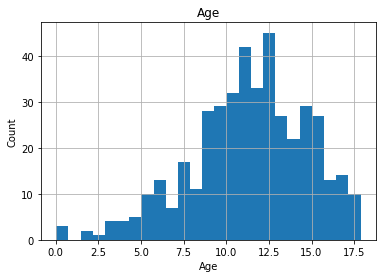

Mean:  11.368982965194755
Standard Deviation:  3.4215754305927013
Variance:  11.70717842723563
Median:  11.5290896646133
Skewness:  -0.5335179802615914
Kurtosis:  0.18148535695904933


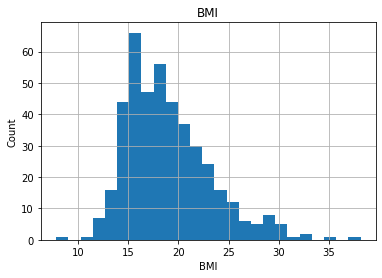

Mean:  18.97640588779564
Standard Deviation:  4.295955180174144
Variance:  18.455230910065062
Median:  18.14369129079185
Skewness:  1.033857438049635
Kurtosis:  1.4447583721378252


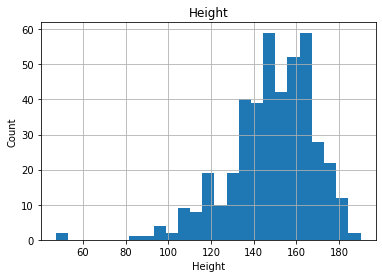

Mean:  148.42093023255816
Standard Deviation:  19.95652568829477
Variance:  398.2629175475691
Median:  150.5
Skewness:  -1.0234186790674535
Kurtosis:  2.3213753441059413


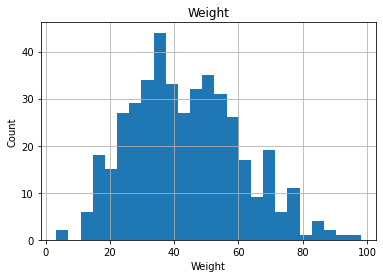

Mean:  43.63217441860466
Standard Deviation:  17.03825772552724
Variance:  290.3022263214887
Median:  42.0
Skewness:  0.36666334027104946
Kurtosis:  -0.22782812790595663


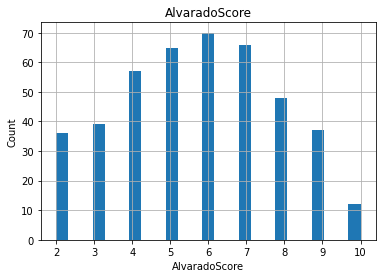

Mean:  5.723255813953489
Standard Deviation:  2.142949322594575
Variance:  4.592231799208546
Median:  6.0
Skewness:  -0.003872326201380987
Kurtosis:  -0.8544752844915351


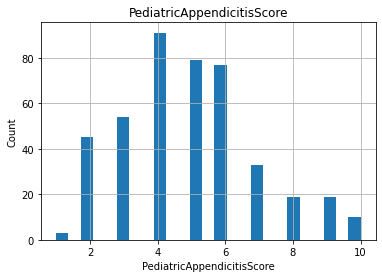

Mean:  4.953488372093023
Standard Deviation:  1.9865924530352301
Variance:  3.946549574456533
Median:  5.0
Skewness:  0.4857780154824137
Kurtosis:  -0.15166924341498245


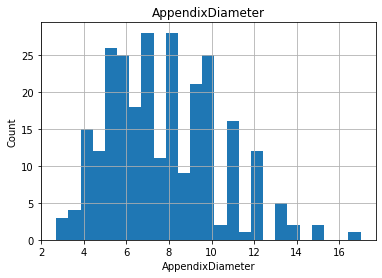

Mean:  7.713157894736842
Standard Deviation:  2.5749181685978244
Variance:  6.630203574975174
Median:  7.3
Skewness:  0.5508988764593958
Kurtosis:  0.06181936605627625


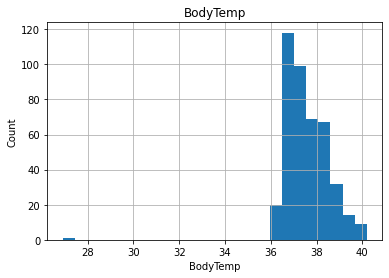

Mean:  37.58969696969692
Standard Deviation:  0.9907314165472837
Variance:  0.9815487397337873
Median:  37.4
Skewness:  -2.5014882797668023
Kurtosis:  30.686959865891303


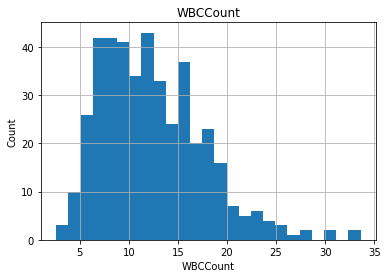

Mean:  12.429342723004684
Standard Deviation:  5.279407991758262
Variance:  27.872148743441006
Median:  11.850000000000001
Skewness:  0.869821670709471
Kurtosis:  0.9621865857406342


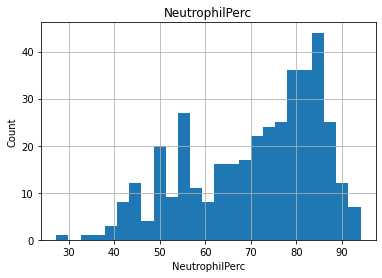

Mean:  70.87350649350645
Standard Deviation:  14.23848490943589
Variance:  202.73445251623355
Median:  74.9
Skewness:  -0.6084973286677053
Kurtosis:  -0.6500872413166463


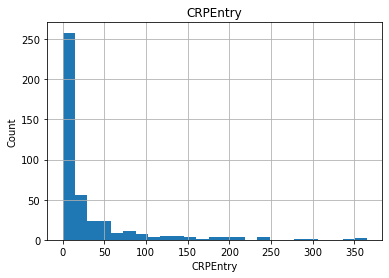

Mean:  30.688443396226415
Standard Deviation:  56.65226461481782
Variance:  3209.479085987339
Median:  7.0
Skewness:  3.0563085074946192
Kurtosis:  10.653349700242508


In [12]:
for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    print("Mean: " , data[feature].mean())
    print("Standard Deviation: ", data[feature].std())
    print("Variance: ", data[feature].var())
    print("Median: " , data[feature].median())
    print("Skewness: " ,data[feature].skew())
    print("Kurtosis: " , data[feature].kurt())

Based on the skewness we can easily fill the null values using median.


This is because all the distribution having null value is either +ve or -ve skewed

## Filling the null variable for neumerical data

In [13]:
numerical_with_nan=[feature for feature in df1.columns if df1[feature].isnull().sum()>0 and df1[feature].dtypes!='O']
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df1[feature].median()
    
    ## create a new feature to capture nan values
    #df1[feature+'nan']=np.where(df1[feature].isnull(),1,0)
    df1[feature].fillna(median_value,inplace=True)
    
df1[numerical_with_nan].isnull().sum()

Age                 0
AppendixDiameter    0
BodyTemp            0
WBCCount            0
NeutrophilPerc      0
CRPEntry            0
dtype: int64

## Finding outliers

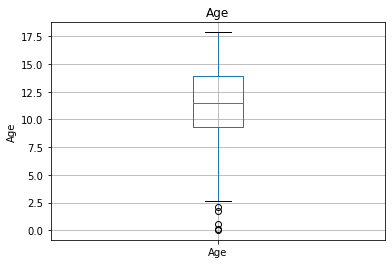

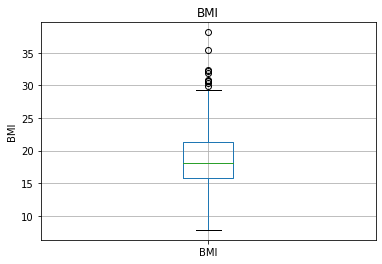

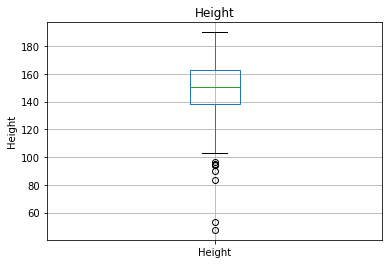

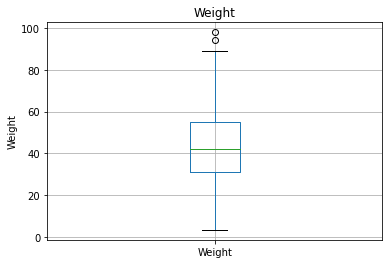

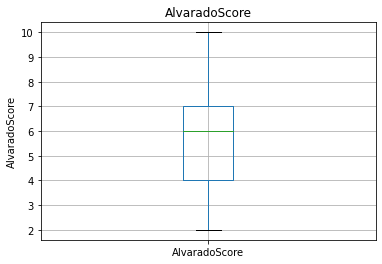

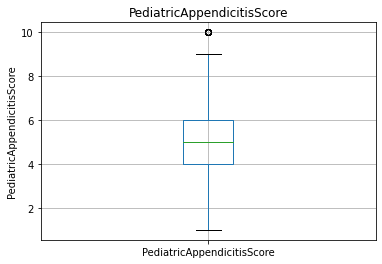

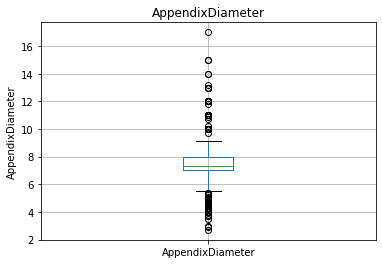

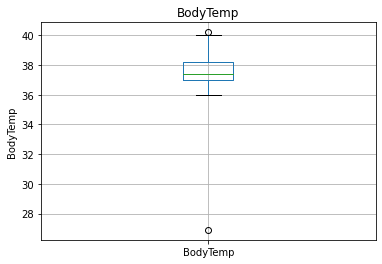

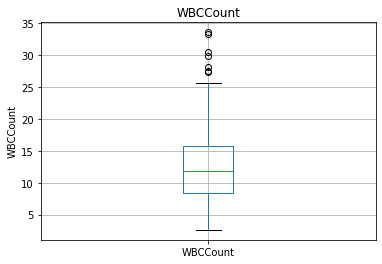

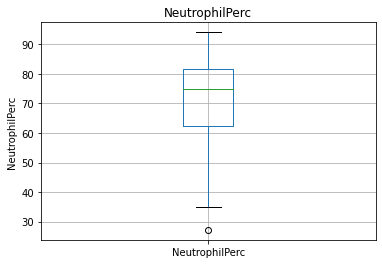

In [14]:
for feature in numerical_features:
    data=df1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

There are some outliers in the following data:

Age, BMI, Height, Weight, AppendixDiameter, WBCCount.

## Finding relationship between the dataset

### Scatter plot with respect to all the numarical data

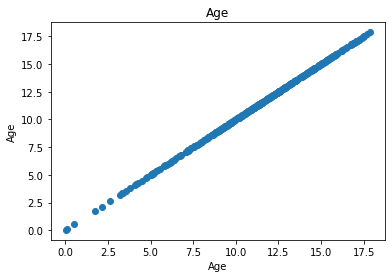

correlation valu r=  1.0


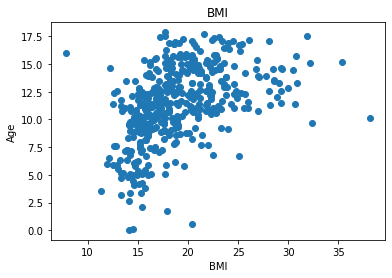

correlation valu r=  0.4578694075157689


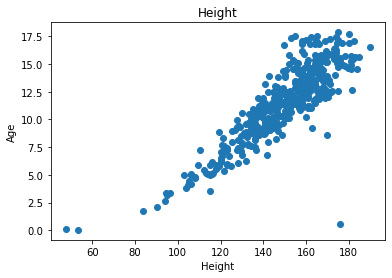

correlation valu r=  0.8683268234482385


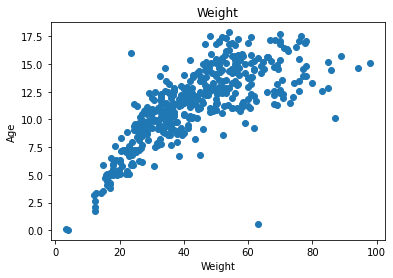

correlation valu r=  0.75128785222908


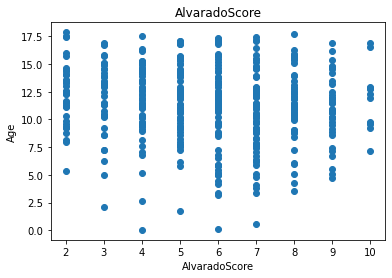

correlation valu r=  -0.11100325167507459


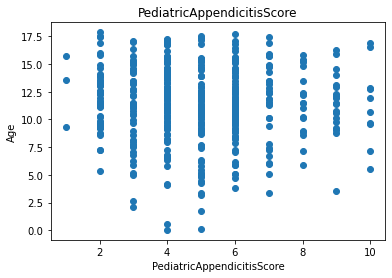

correlation valu r=  -0.04037561485539761


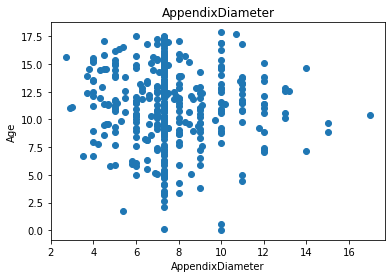

correlation valu r=  -0.04825114909677059


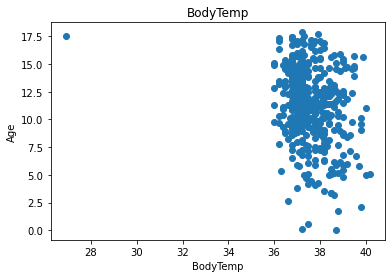

correlation valu r=  -0.2487303560801766


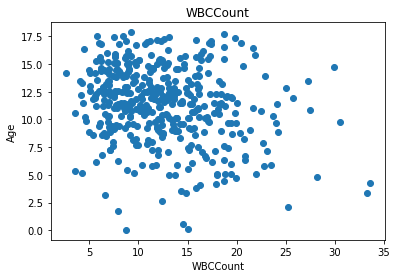

correlation valu r=  -0.21981104845611177


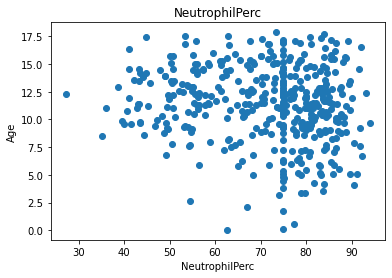

correlation valu r=  -0.12481080917174878


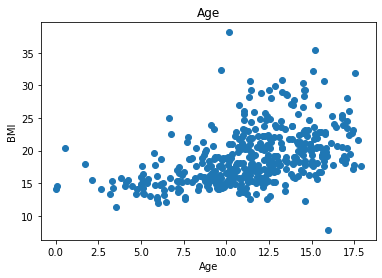

correlation valu r=  0.45786940751576893


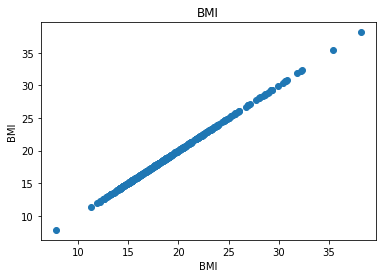

correlation valu r=  1.0


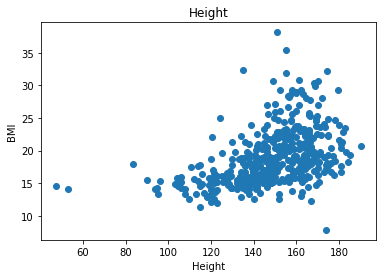

correlation valu r=  0.4494185763936695


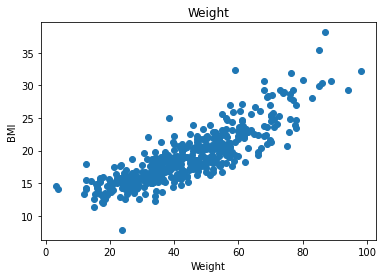

correlation valu r=  0.8570117680377024


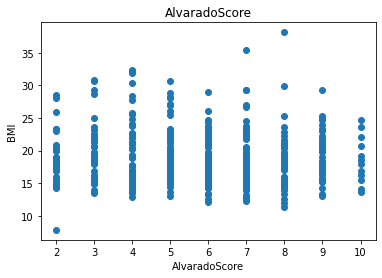

correlation valu r=  -0.06334609397697474


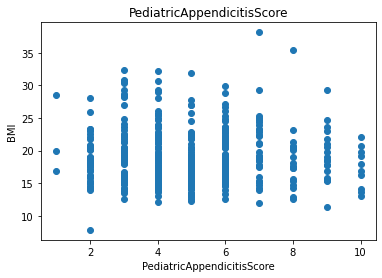

correlation valu r=  -0.0167896864748689


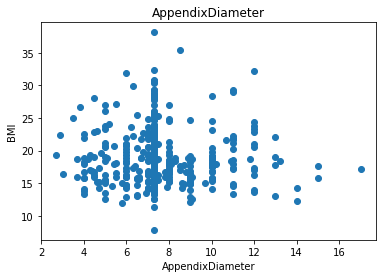

correlation valu r=  -0.01892396124664743


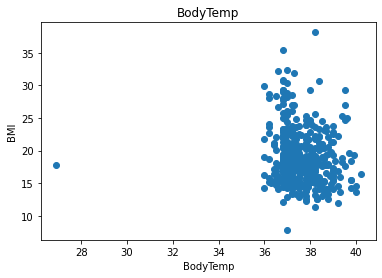

correlation valu r=  -0.11933908079526817


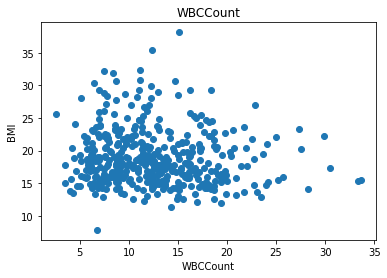

correlation valu r=  -0.0948125872088607


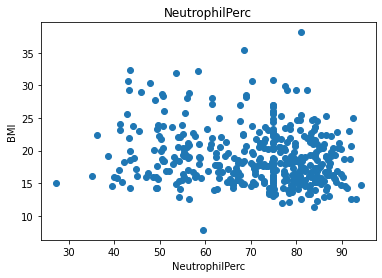

correlation valu r=  -0.16476930538749435


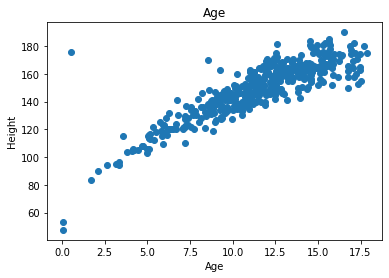

correlation valu r=  0.8683268234482384


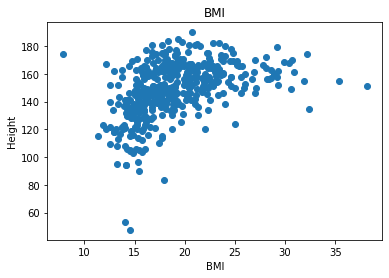

correlation valu r=  0.44941857639366944


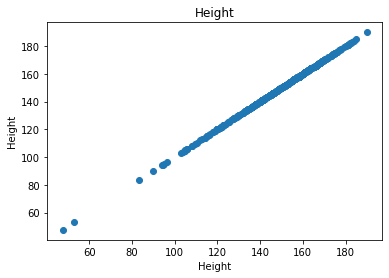

correlation valu r=  1.0


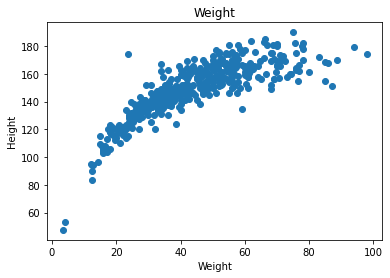

correlation valu r=  0.8227021619133994


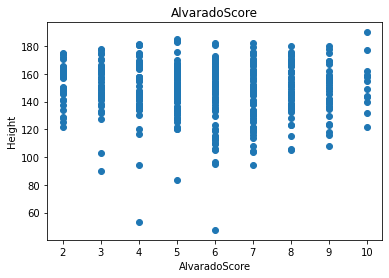

correlation valu r=  -0.08492116001203233


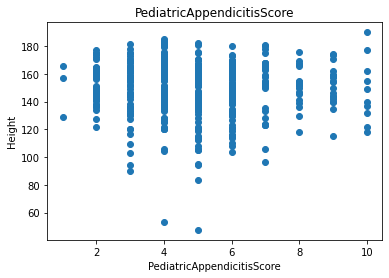

correlation valu r=  -0.030902169807459308


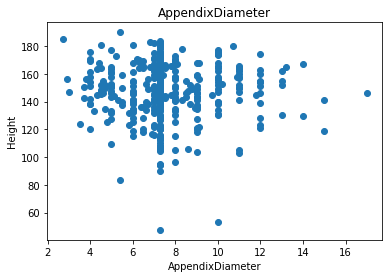

correlation valu r=  -0.019952639365025476


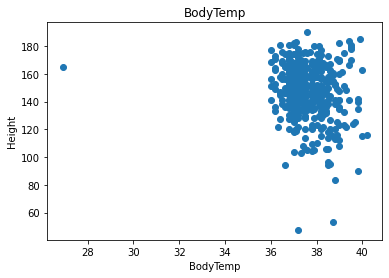

correlation valu r=  -0.19250485541273663


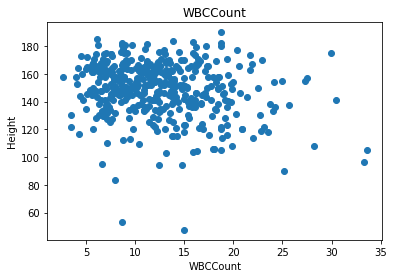

correlation valu r=  -0.20584296945536204


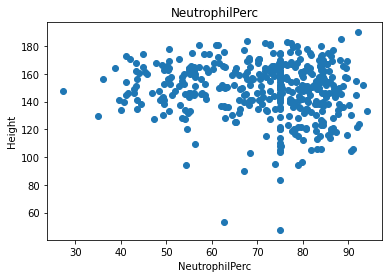

correlation valu r=  -0.1155031934397938


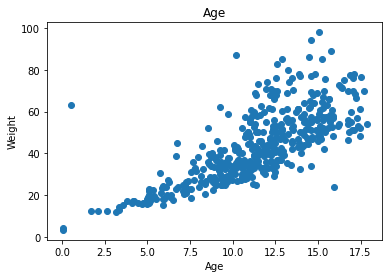

correlation valu r=  0.7512878522290801


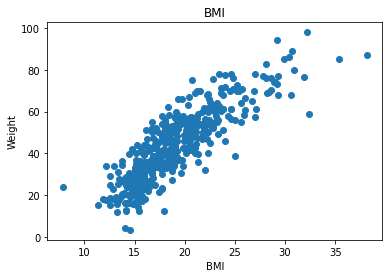

correlation valu r=  0.8570117680377024


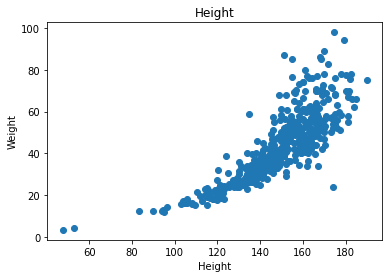

correlation valu r=  0.8227021619133994


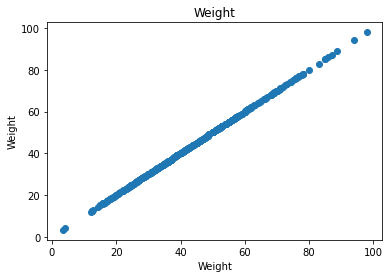

correlation valu r=  1.0


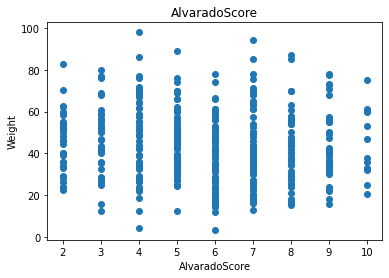

correlation valu r=  -0.08042743334176465


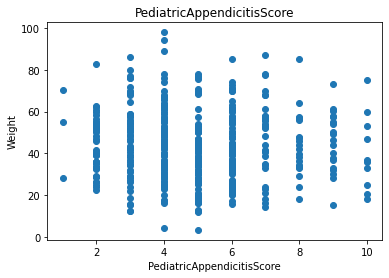

correlation valu r=  -0.026046491293655206


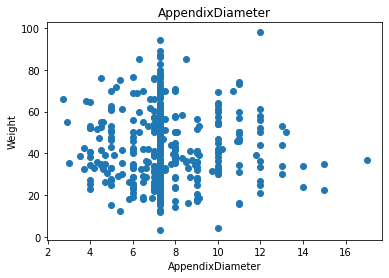

correlation valu r=  -0.022285576115313743


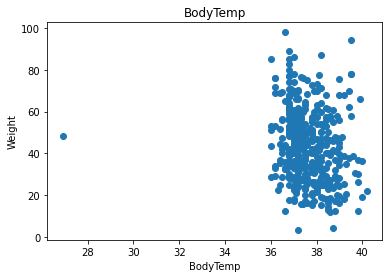

correlation valu r=  -0.17076235081887114


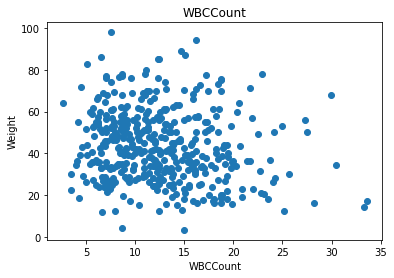

correlation valu r=  -0.15887626634980329


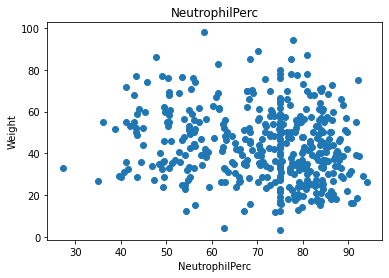

correlation valu r=  -0.15528558382282867


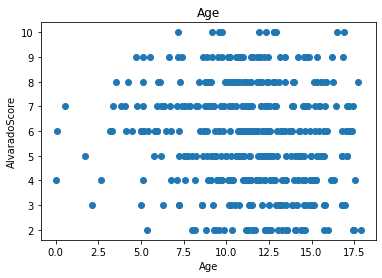

correlation valu r=  -0.11100325167507459


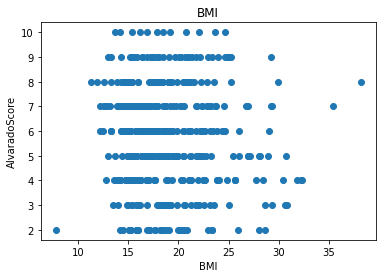

correlation valu r=  -0.06334609397697474


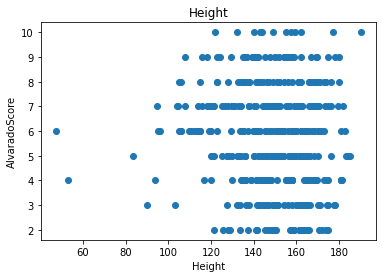

correlation valu r=  -0.08492116001203233


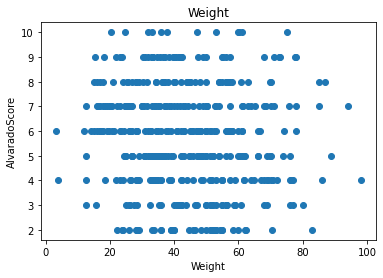

correlation valu r=  -0.08042743334176465


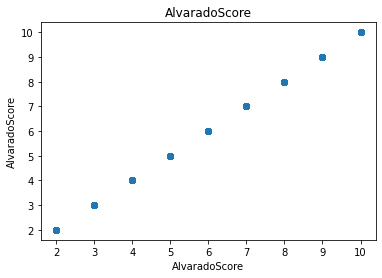

correlation valu r=  0.9999999999999998


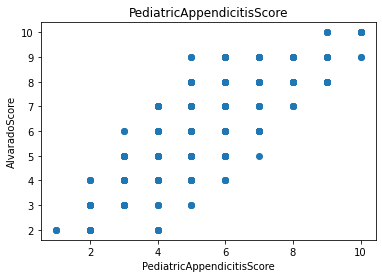

correlation valu r=  0.8259567318684817


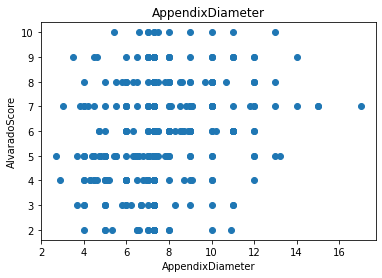

correlation valu r=  0.2327803547920461


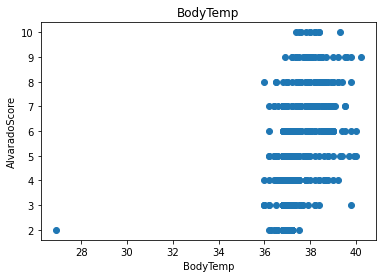

correlation valu r=  0.4095506397439789


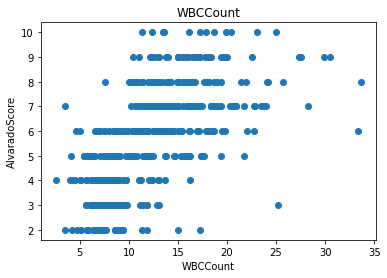

correlation valu r=  0.6190743660636885


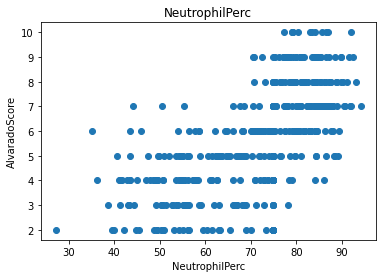

correlation valu r=  0.6436091929752406


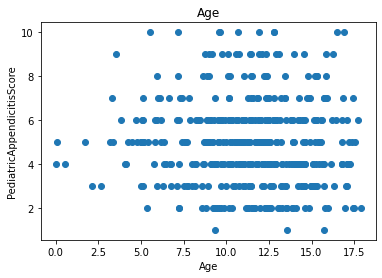

correlation valu r=  -0.04037561485539762


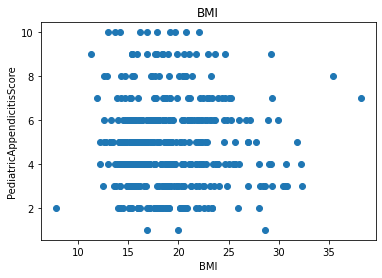

correlation valu r=  -0.016789686474868903


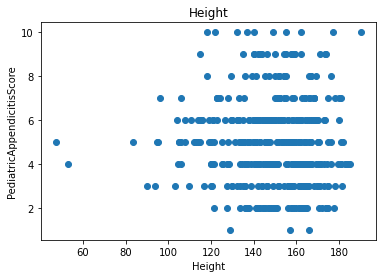

correlation valu r=  -0.03090216980745931


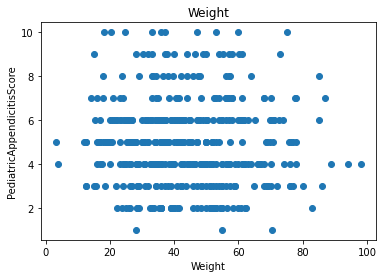

correlation valu r=  -0.026046491293655206


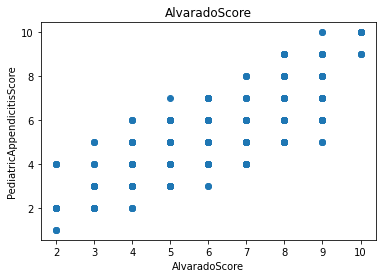

correlation valu r=  0.8259567318684817


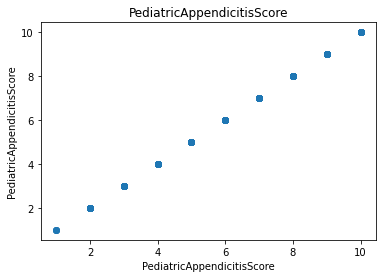

correlation valu r=  1.0


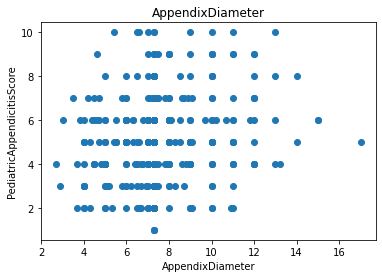

correlation valu r=  0.18792288254391168


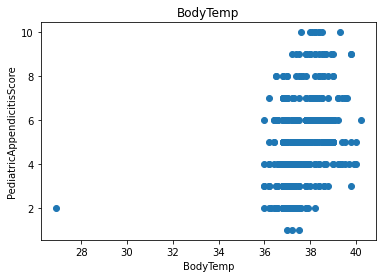

correlation valu r=  0.3469112844261159


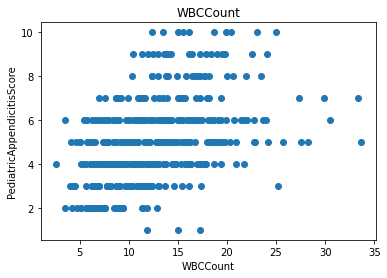

correlation valu r=  0.45681300668673885


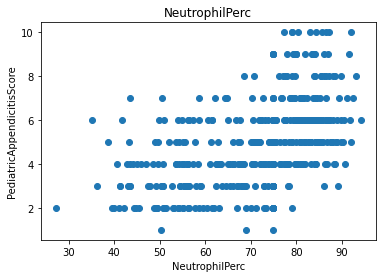

correlation valu r=  0.5032645133874833


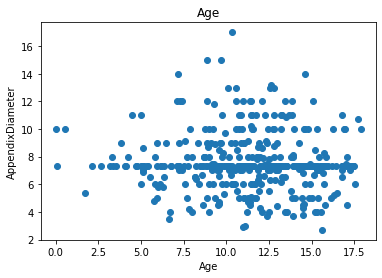

correlation valu r=  -0.0482511490967706


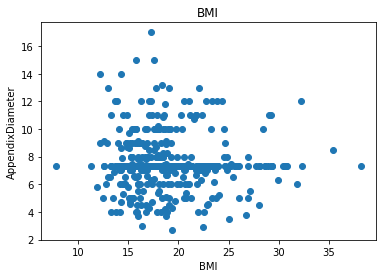

correlation valu r=  -0.01892396124664743


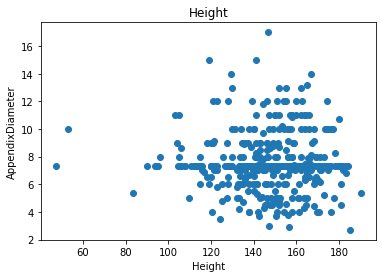

correlation valu r=  -0.019952639365025476


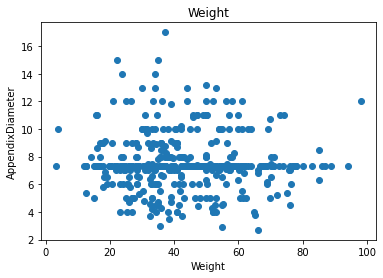

correlation valu r=  -0.022285576115313743


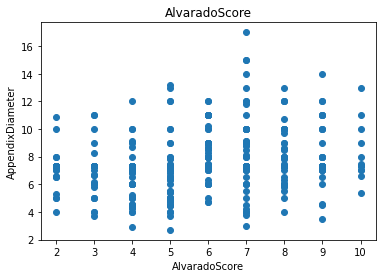

correlation valu r=  0.2327803547920461


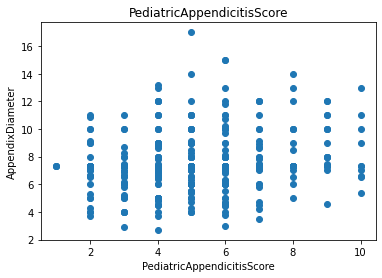

correlation valu r=  0.18792288254391168


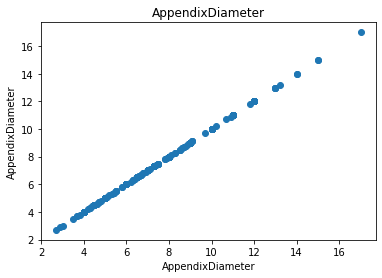

correlation valu r=  1.0


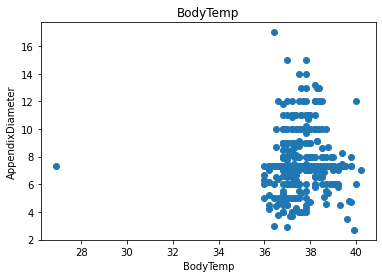

correlation valu r=  0.04537496038283803


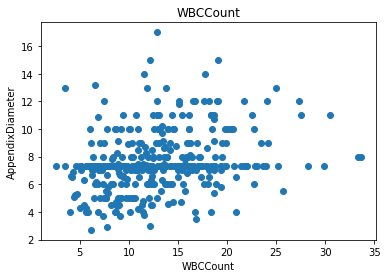

correlation valu r=  0.2848494972407098


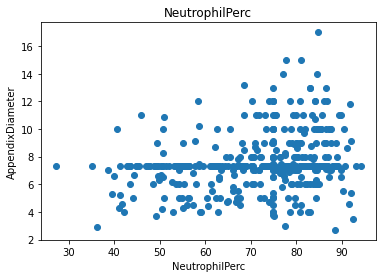

correlation valu r=  0.24133228157881828


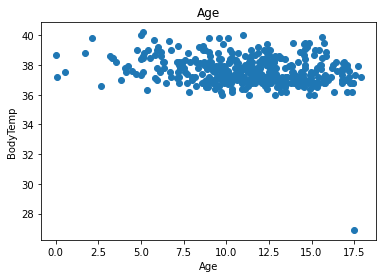

correlation valu r=  -0.24873035608017663


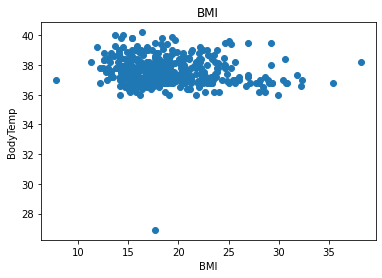

correlation valu r=  -0.11933908079526817


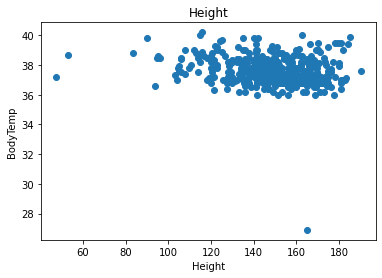

correlation valu r=  -0.1925048554127366


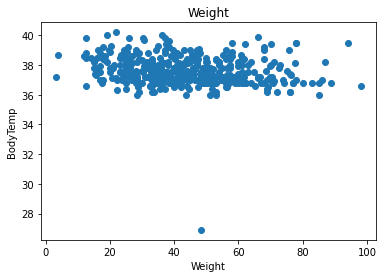

correlation valu r=  -0.17076235081887114


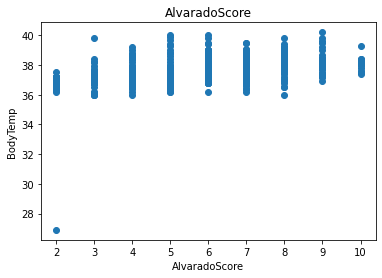

correlation valu r=  0.4095506397439788


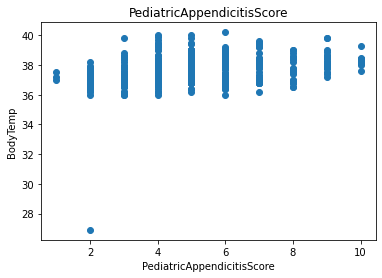

correlation valu r=  0.3469112844261159


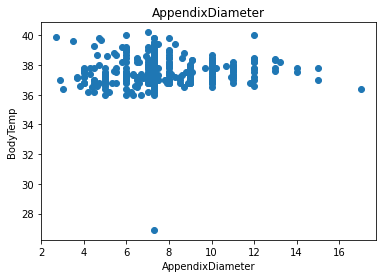

correlation valu r=  0.045374960382838024


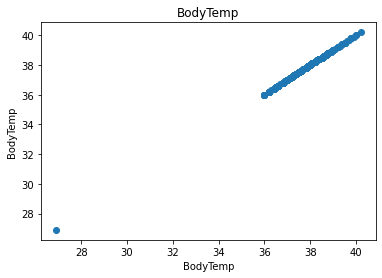

correlation valu r=  0.9999999999999999


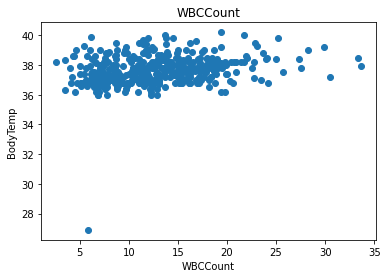

correlation valu r=  0.2657191702568424


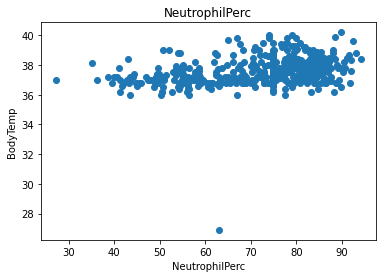

correlation valu r=  0.323123191858223


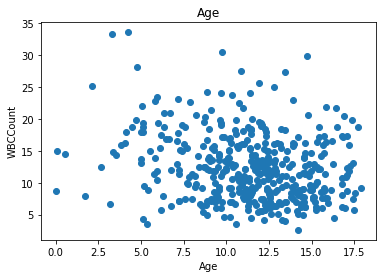

correlation valu r=  -0.21981104845611177


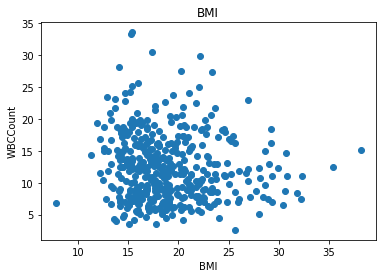

correlation valu r=  -0.09481258720886068


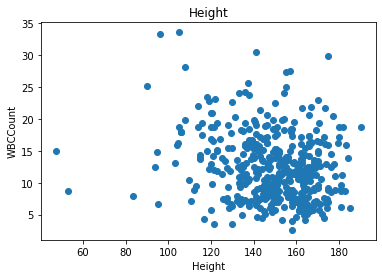

correlation valu r=  -0.20584296945536207


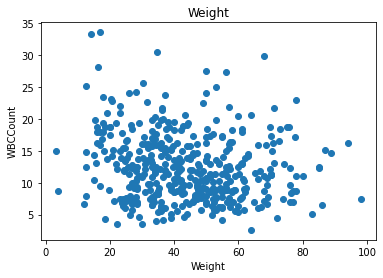

correlation valu r=  -0.15887626634980329


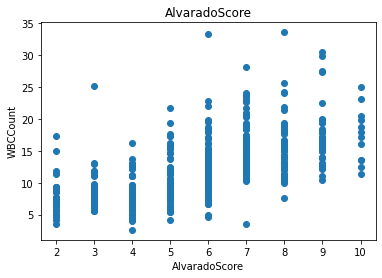

correlation valu r=  0.6190743660636884


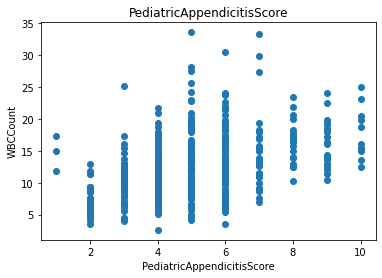

correlation valu r=  0.4568130066867388


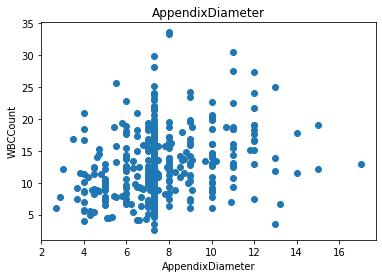

correlation valu r=  0.2848494972407098


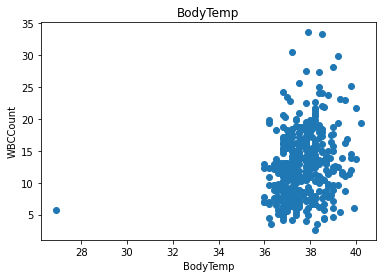

correlation valu r=  0.2657191702568424


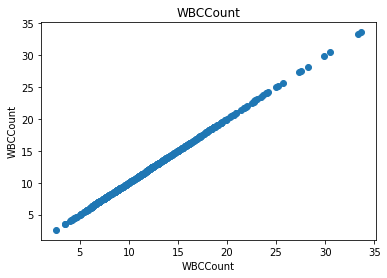

correlation valu r=  1.0


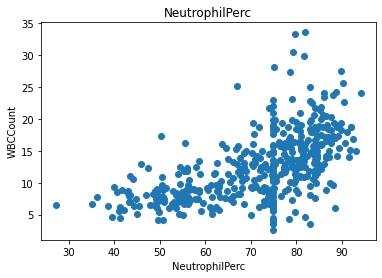

correlation valu r=  0.5752789033241722


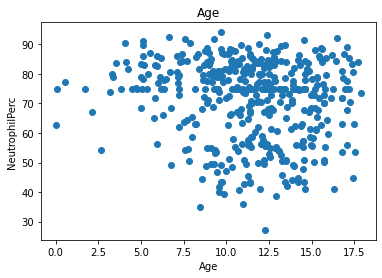

correlation valu r=  -0.12481080917174878


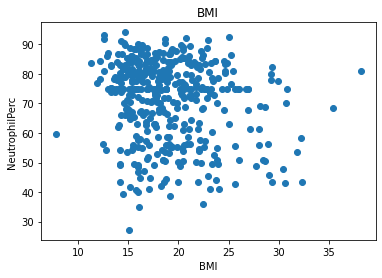

correlation valu r=  -0.16476930538749435


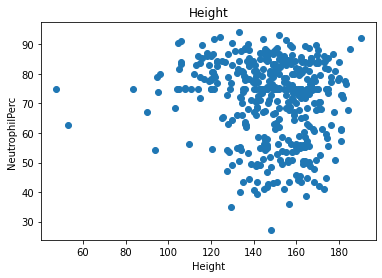

correlation valu r=  -0.11550319343979379


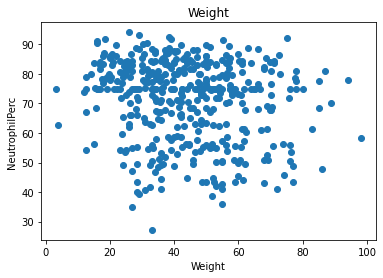

correlation valu r=  -0.15528558382282867


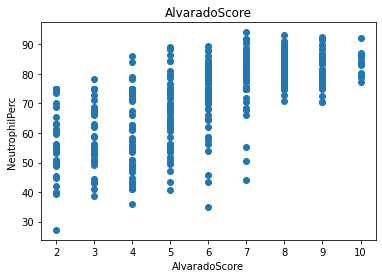

correlation valu r=  0.6436091929752404


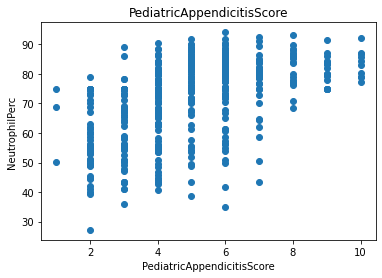

correlation valu r=  0.5032645133874833


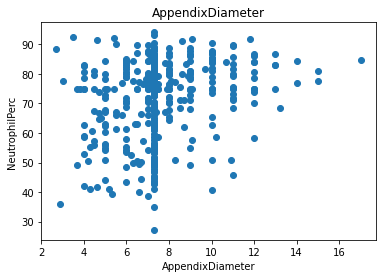

correlation valu r=  0.24133228157881828


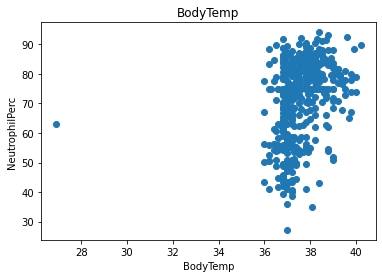

correlation valu r=  0.323123191858223


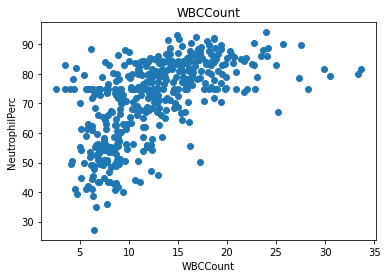

correlation valu r=  0.5752789033241722


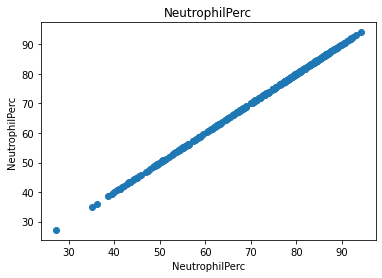

correlation valu r=  1.0


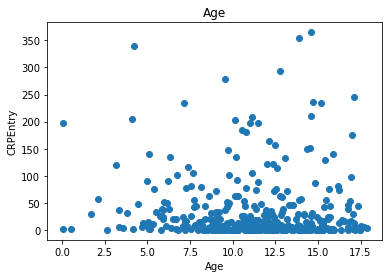

correlation valu r=  -0.05918604311751841


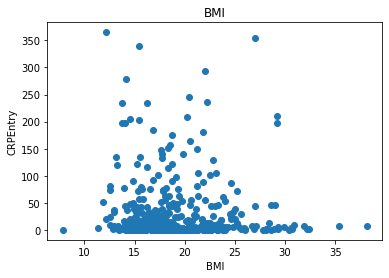

correlation valu r=  -0.04477500771302179


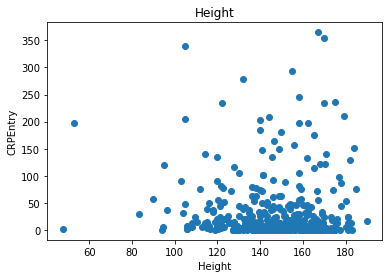

correlation valu r=  -0.0663865035680733


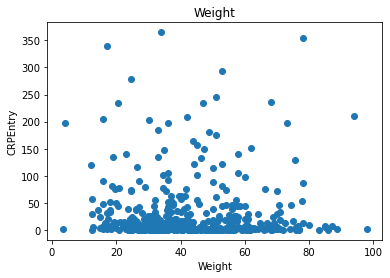

correlation valu r=  -0.045547473164023584


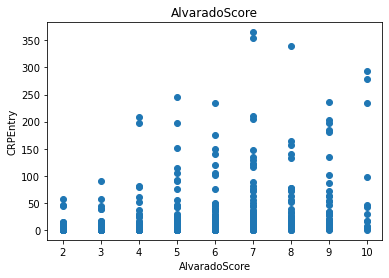

correlation valu r=  0.2895831983523022


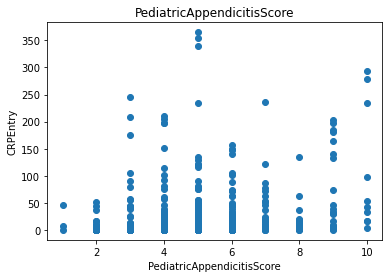

correlation valu r=  0.23482696991197155


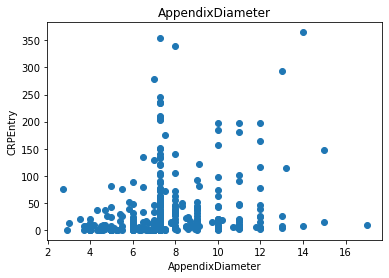

correlation valu r=  0.23816742717706385


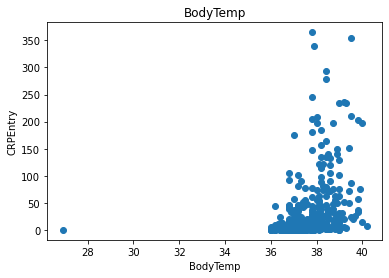

correlation valu r=  0.3697067704615001


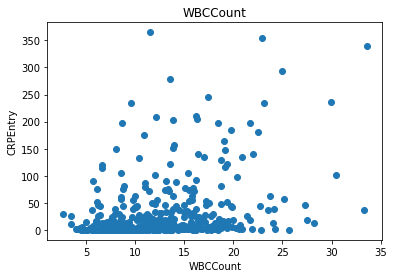

correlation valu r=  0.3404220395757626


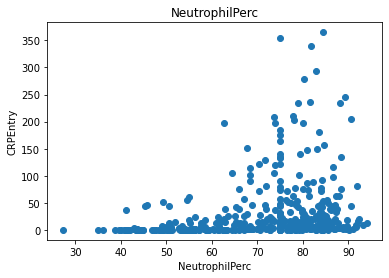

correlation valu r=  0.24603638825604665


In [15]:
#Scatter
for fet in numerical_features:
    for feature in numerical_features:
        data=df1.copy()
        if 0 in data[feature].unique():
            pass
        else:
            plt.scatter(data[feature],data[fet])
            plt.xlabel(feature)
            plt.ylabel(fet)
            plt.title(feature)
            plt.show()
            print( "correlation valu r= ", data[feature].corr(data[fet]))

### Correlation Range¶

.90 to 1.00(-.90 to -1.00) Very high positive (negative) correlation 

.70 to .90(-.70 to -.90) High positive (negative) correlation 

.50 to .70 (−.50 to −.70) Moderate positive (negative) correlation

30 to .50 (−.30 to −.50) Low positive (negative) correlation

.00 to .30 (.00 to −.30) negligible correlation

In [16]:
df1.corr()

,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixDiameter,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry
Age,1.000000,0.457869,0.868327,0.751288,-0.111003,-0.040376,-0.048251,-0.248730,-0.219811,-0.124811,-0.059186
BMI,0.457869,1.000000,0.449419,0.857012,-0.063346,-0.016790,-0.018924,-0.119339,-0.094813,-0.164769,-0.044775
Height,0.868327,0.449419,1.000000,0.822702,-0.084921,-0.030902,-0.019953,-0.192505,-0.205843,-0.115503,-0.066387
Weight,0.751288,0.857012,0.822702,1.000000,-0.080427,-0.026046,-0.022286,-0.170762,-0.158876,-0.155286,-0.045547
AlvaradoScore,-0.111003,-0.063346,-0.084921,-0.080427,1.000000,0.825957,0.232780,0.409551,0.619074,0.643609,0.289583
PediatricAppendicitisScore,-0.040376,-0.016790,-0.030902,-0.026046,0.825957,1.000000,0.187923,0.346911,0.456813,0.503265,0.234827
AppendixDiameter,-0.048251,-0.018924,-0.019953,-0.022286,0.232780,0.187923,1.000000,0.045375,0.284849,0.241332,0.238167
BodyTemp,-0.248730,-0.119339,-0.192505,-0.170762,0.409551,0.346911,0.045375,1.000000,0.265719,0.323123,0.369707
WBCCount,-0.219811,-0.094813,-0.205843,-0.158876,0.619074,0.456813,0.284849,0.265719,1.000000,0.575279,0.340422
NeutrophilPerc,-0.124811,-0.164769,-0.115503,-0.155286,0.643609,0.503265,0.241332,0.323123,0.575279,1.000000,0.246036


# Working with Catergorical Data

In [17]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtypes=='O']
categorical_features

['Sex',
 'AppendixOnSono',
 'MigratoryPain',
 'LowerAbdominalPainRight',
 'ReboundTenderness',
 'CoughingPain',
 'PsoasSign',
 'Nausea',
 'AppetiteLoss',
 'KetonesInUrine',
 'ErythrocytesInUrine',
 'WBCInUrine',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'FreeFluids',
 'DiagnosisByCriteria',
 'TreatmentGroupBinar',
 'AppendicitisComplications']

In [18]:
# 
df1[categorical_features].nunique()

Sex                          2
AppendixOnSono               2
MigratoryPain                2
LowerAbdominalPainRight      2
ReboundTenderness            2
CoughingPain                 2
PsoasSign                    2
Nausea                       2
AppetiteLoss                 2
KetonesInUrine               4
ErythrocytesInUrine          4
WBCInUrine                   4
Dysuria                      2
Stool                        3
Peritonitis                  3
FreeFluids                   2
DiagnosisByCriteria          2
TreatmentGroupBinar          2
AppendicitisComplications    2
dtype: int64

This shows the number of unique category in all the column

In [19]:
df8=df1.copy()
df8

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,PsoasSign,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,yes,no,no,negative,yes,no,38.7,13.3,66.0,+,+,no,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,7.3,no,yes,yes,yes,negative,yes,no,38.8,14.9,93.2,NaN,NaN,NaN,10.0,no,normal,no,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,yes,no,no,negative,no,yes,37.2,6.6,55.3,no,no,no,13.0,NaN,normal,no,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,yes,no,no,NaN,no,no,37.0,12.4,57.9,no,no,no,6.0,NaN,normal,local,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,yes,no,no,positive,no,no,37.2,4.2,50.6,no,no,no,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,7.3,no,yes,no,no,negative,no,no,38.4,10.3,74.9,no,no,no,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,7.3,yes,yes,yes,yes,positive,no,no,36.8,11.0,82.4,NaN,NaN,NaN,5.0,no,normal,no,no,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,7.3,yes,yes,yes,yes,NaN,yes,no,37.0,7.5,56.3,NaN,NaN,NaN,1.0,no,normal,no,no,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,7.3,no,yes,yes,no,negative,no,no,38.8,9.8,54.5,+,+,++,55.0,no,obstipation,no,no,noAppendicitis,conservative,no


# Some Statistical information of the cateforical data

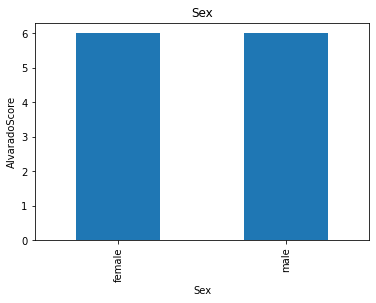

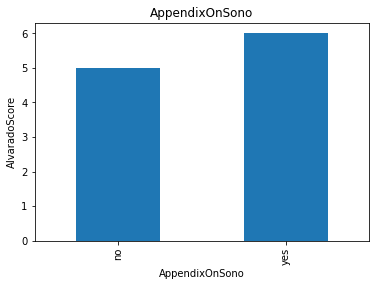

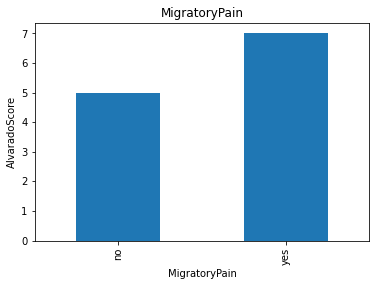

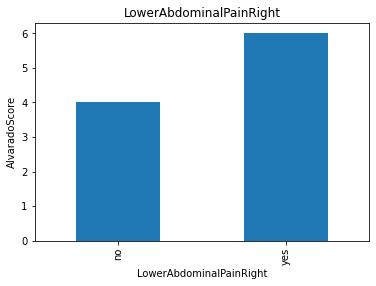

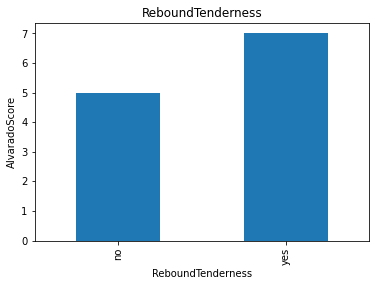

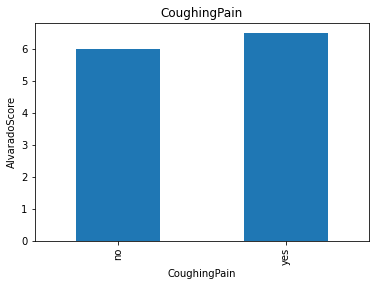

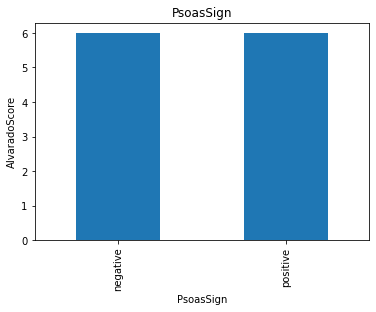

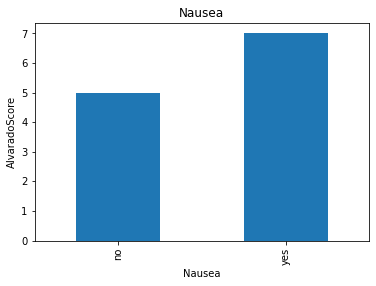

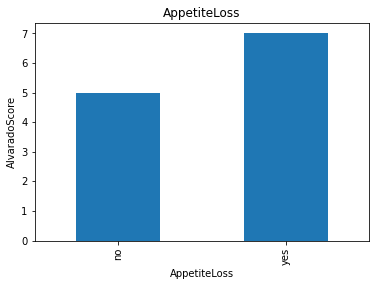

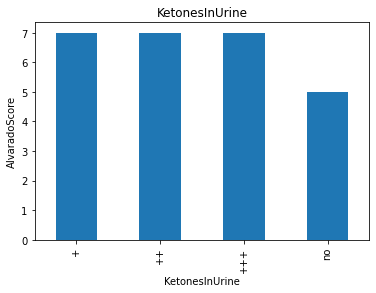

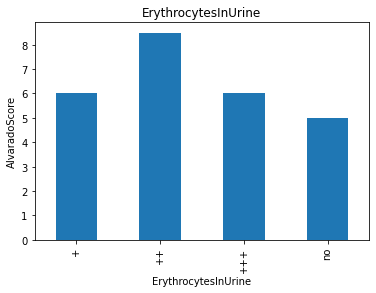

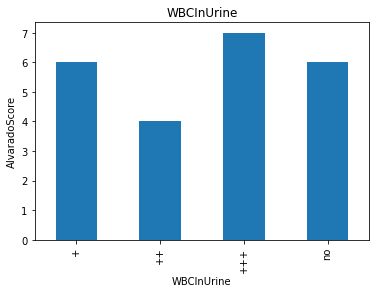

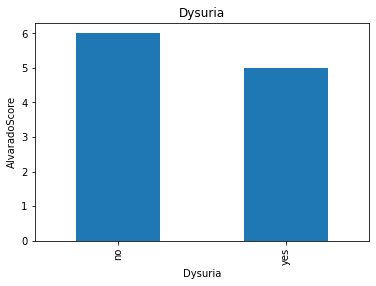

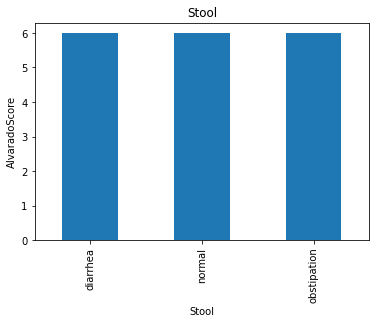

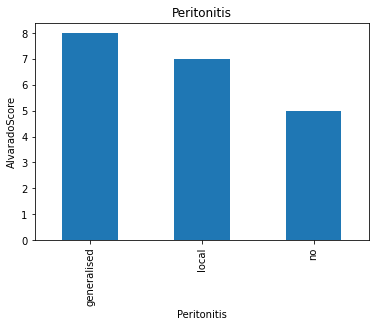

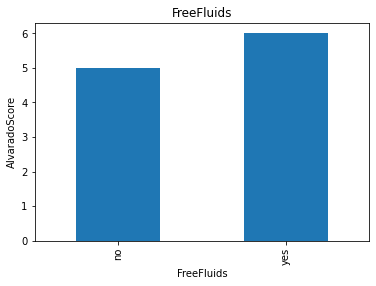

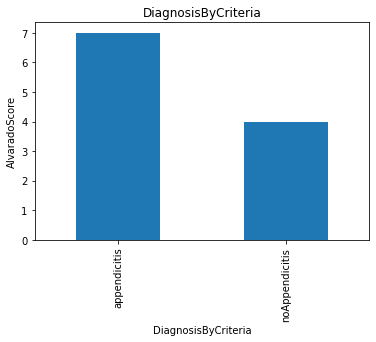

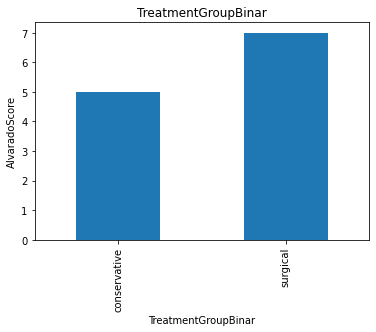

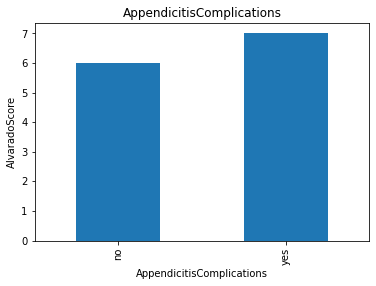

In [20]:
for feature in categorical_features:
    data=df8.copy()
    data.groupby(feature)['AlvaradoScore'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('AlvaradoScore')
    plt.title(feature)
    plt.show()

In [21]:
## Null Values
df1[categorical_features].isnull().sum()

Sex                            0
AppendixOnSono                 2
MigratoryPain                  0
LowerAbdominalPainRight        1
ReboundTenderness              3
CoughingPain                   1
PsoasSign                     37
Nausea                         0
AppetiteLoss                   1
KetonesInUrine               123
ErythrocytesInUrine          123
WBCInUrine                   123
Dysuria                       19
Stool                          6
Peritonitis                    0
FreeFluids                    17
DiagnosisByCriteria            0
TreatmentGroupBinar            0
AppendicitisComplications      0
dtype: int64

It gives us the Null Attribute of the features

We can fill the value with mode for those feature who have less then 10 missing values

As it is less then 3% of total data of any column it will not create any imbalance

Those who have missing value more than that for them we will label them as missing and use "One hot encoding"

['AppendixOnSono', 'LowerAbdominalPainRight', 'ReboundTenderness', 'CoughingPain', 'AppetiteLoss', 'Stool']


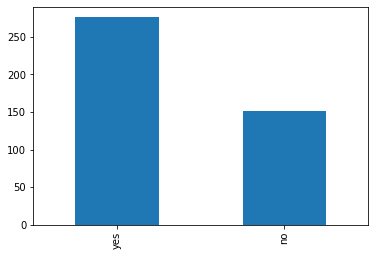

0    yes
Name: AppendixOnSono, dtype: object


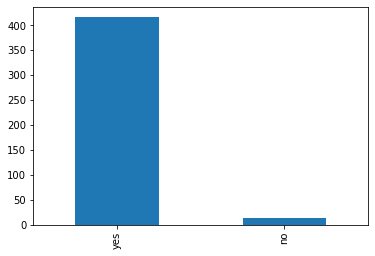

0    yes
Name: LowerAbdominalPainRight, dtype: object


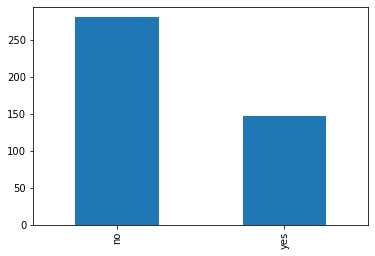

0    no
Name: ReboundTenderness, dtype: object


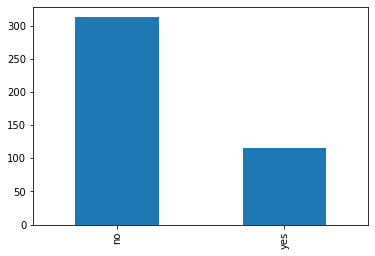

0    no
Name: CoughingPain, dtype: object


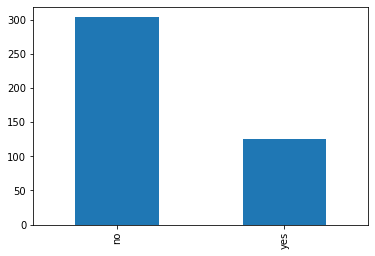

0    no
Name: AppetiteLoss, dtype: object


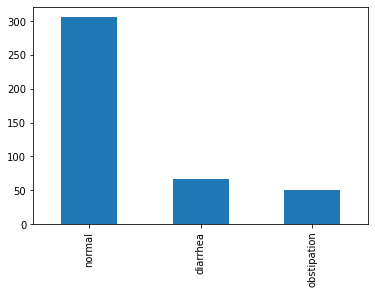

0    normal
Name: Stool, dtype: object


In [22]:
cat_miss_lessten=[feature for feature in df8.columns if df8[feature].isnull().sum()<10 and df8[feature].isnull().sum()>0 and df8[feature].dtypes=='O']
print(cat_miss_lessten)
for feature in cat_miss_lessten:
    data=df8.copy()
    data[feature].value_counts().plot.bar(column=feature) 
    plt.show()
    print(data[feature].mode())

In [23]:
df8['AppendixOnSono'].fillna('yes',inplace=True)
df8['LowerAbdominalPainRight'].fillna('yes',inplace=True)
df8['ReboundTenderness'].fillna('no',inplace=True)
df8['CoughingPain'].fillna('no',inplace=True)
df8['AppetiteLoss'].fillna('no',inplace=True)
df8['Stool'].fillna('normal',inplace=True)


In [24]:
df8[cat_miss_lessten].isnull().sum()

AppendixOnSono             0
LowerAbdominalPainRight    0
ReboundTenderness          0
CoughingPain               0
AppetiteLoss               0
Stool                      0
dtype: int64

### Missing values have been replaced by mode for those who had less than 10 missing values

### Those who have missing value more than that for them we will label them as missing and use "One hof encoding"

In [25]:
## converting the targeted categorical variable in binary data
df8['DiagnosisByCriteria'].replace({'noAppendicitis': 0, 'appendicitis': 1},inplace=True)
df8

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,PsoasSign,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,yes,no,no,negative,yes,no,38.7,13.3,66.0,+,+,no,76.0,no,normal,no,no,0,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,7.3,no,yes,yes,yes,negative,yes,no,38.8,14.9,93.2,NaN,NaN,NaN,10.0,no,normal,no,NaN,1,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,yes,no,no,negative,no,yes,37.2,6.6,55.3,no,no,no,13.0,NaN,normal,no,no,0,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,yes,no,no,NaN,no,no,37.0,12.4,57.9,no,no,no,6.0,NaN,normal,local,no,1,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,yes,no,no,positive,no,no,37.2,4.2,50.6,no,no,no,2.0,no,obstipation,no,no,0,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,7.3,no,yes,no,no,negative,no,no,38.4,10.3,74.9,no,no,no,1.0,no,diarrhea,no,no,0,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,7.3,yes,yes,yes,yes,positive,no,no,36.8,11.0,82.4,NaN,NaN,NaN,5.0,no,normal,no,no,0,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,7.3,yes,yes,yes,yes,NaN,yes,no,37.0,7.5,56.3,NaN,NaN,NaN,1.0,no,normal,no,no,0,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,7.3,no,yes,yes,no,negative,no,no,38.8,9.8,54.5,+,+,++,55.0,no,obstipation,no,no,0,conservative,no


## Labeling missing

In [26]:
features_nan=[feature for feature in df8.columns if df8[feature].isnull().sum()>0 and df8[feature].dtypes=='O']
df8[features_nan]=df8[features_nan].fillna('Missing')


# Preparing categorical data into numarics for test and train 

In [27]:
New_categorical_features=[feature for feature in df8.columns if df8[feature].dtypes=='O']
New_categorical_features

for feature in New_categorical_features:
    con=pd.get_dummies(df8[feature],columns=[feature],prefix=[feature],drop_first=True)
    df8=pd.concat([con,df8],axis=1)


In [28]:
df8

,['AppendicitisComplications']_yes,['TreatmentGroupBinar']_surgical,['FreeFluids']_no,['FreeFluids']_yes,['Peritonitis']_local,['Peritonitis']_no,['Stool']_normal,['Stool']_obstipation,['Dysuria']_no,['Dysuria']_yes,['WBCInUrine']_++,['WBCInUrine']_+++,['WBCInUrine']_Missing,['WBCInUrine']_no,['ErythrocytesInUrine']_++,['ErythrocytesInUrine']_+++,['ErythrocytesInUrine']_Missing,['ErythrocytesInUrine']_no,['KetonesInUrine']_++,['KetonesInUrine']_+++,['KetonesInUrine']_Missing,['KetonesInUrine']_no,['AppetiteLoss']_yes,['Nausea']_yes,['PsoasSign']_negative,['PsoasSign']_positive,['CoughingPain']_yes,['ReboundTenderness']_yes,['LowerAbdominalPainRight']_yes,['MigratoryPain']_yes,['AppendixOnSono']_yes,['Sex']_male,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,PsoasSign,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,KetonesInUrine,ErythrocytesInUrine,WBCInUrine,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,yes,no,no,negative,yes,no,38.7,13.3,66.0,+,+,no,76.0,no,normal,no,no,0,conservative,no
1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,12.410678,12.595222,female,152.0,29.1,8,8,yes,7.3,no,yes,yes,yes,negative,yes,no,38.8,14.9,93.2,Missing,Missing,Missing,10.0,no,normal,no,Missing,1,surgical,no
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,yes,no,no,negative,no,yes,37.2,6.6,55.3,no,no,no,13.0,Missing,normal,no,no,0,conservative,no
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,yes,no,no,Missing,no,no,37.0,12.4,57.9,no,no,no,6.0,Missing,normal,local,no,1,conservative,no
4,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,yes,no,no,positive,no,no,37.2,4.2,50.6,no,no,no,2.0,no,obstipation,no,no,0,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,12.147844,22.292563,male,166.5,61.8,5,4,no,7.3,no,yes,no,no,negative,no,no,38.4,10.3,74.9,no,no,no,1.0,no,diarrhea,no,no,0,conservative,no
426,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,12.528405,29.316297,male,152.3,68.0,7,7,no,7.3,yes,yes,yes,yes,positive,no,no,36.8,11.0,82.4,Missing,Missing,Missing,5.0,no,normal,no,no,0,conservative,no
427,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,12.013689,28.906250,male,160.0,74.0,5,6,no,7.3,yes,yes,yes,yes,Missing,yes,no,37.0,7.5,56.3,Missing,Missing,Missing,1.0,no,normal,no,no,0,conservative,no
428,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,7.739904,22.038188,female,120.5,32.0,5,3,no,7.3,no,yes,yes,no,negative,no,no,38.8,9.8,54.5,+,+,++,55.0,no,obstipation,no,no,0,conservative,no


In [29]:
df8.drop(['Sex','AppendixOnSono','MigratoryPain','LowerAbdominalPainRight','ReboundTenderness','CoughingPain','PsoasSign','Nausea','AppetiteLoss','KetonesInUrine','ErythrocytesInUrine','WBCInUrine','Dysuria','Stool','Peritonitis','FreeFluids','TreatmentGroupBinar','AppendicitisComplications'],axis=1,inplace=True)

In [30]:
df8

,['AppendicitisComplications']_yes,['TreatmentGroupBinar']_surgical,['FreeFluids']_no,['FreeFluids']_yes,['Peritonitis']_local,['Peritonitis']_no,['Stool']_normal,['Stool']_obstipation,['Dysuria']_no,['Dysuria']_yes,['WBCInUrine']_++,['WBCInUrine']_+++,['WBCInUrine']_Missing,['WBCInUrine']_no,['ErythrocytesInUrine']_++,['ErythrocytesInUrine']_+++,['ErythrocytesInUrine']_Missing,['ErythrocytesInUrine']_no,['KetonesInUrine']_++,['KetonesInUrine']_+++,['KetonesInUrine']_Missing,['KetonesInUrine']_no,['AppetiteLoss']_yes,['Nausea']_yes,['PsoasSign']_negative,['PsoasSign']_positive,['CoughingPain']_yes,['ReboundTenderness']_yes,['LowerAbdominalPainRight']_yes,['MigratoryPain']_yes,['AppendixOnSono']_yes,['Sex']_male,Age,BMI,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixDiameter,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,DiagnosisByCriteria
0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,12.531143,16.494601,159.0,41.7,7,5,5.5,38.7,13.3,66.0,76.0,0
1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,12.410678,12.595222,152.0,29.1,8,8,7.3,38.8,14.9,93.2,10.0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,10.537988,15.991247,133.5,28.5,3,3,6.0,37.2,6.6,55.3,13.0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,10.425736,16.185025,146.0,34.5,4,3,6.0,37.0,12.4,57.9,6.0,1
4,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,13.270363,20.449137,164.0,55.0,2,2,6.5,37.2,4.2,50.6,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,12.147844,22.292563,166.5,61.8,5,4,7.3,38.4,10.3,74.9,1.0,0
426,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,12.528405,29.316297,152.3,68.0,7,7,7.3,36.8,11.0,82.4,5.0,0
427,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,12.013689,28.906250,160.0,74.0,5,6,7.3,37.0,7.5,56.3,1.0,0
428,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,7.739904,22.038188,120.5,32.0,5,3,7.3,38.8,9.8,54.5,55.0,0


# Splitting the dataset int 70-30% for test and train

Considering DiagnosisByCriteria as our independent or target variable

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df8.drop('DiagnosisByCriteria',axis=1), 
                                                    df8['DiagnosisByCriteria'], test_size=0.30, 
                                                    random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=regression.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.4266666666666665


In [35]:
## Calculating Loss
from sklearn.metrics import mean_squared_error
L3=np.square(mean_squared_error(y_test,y_pred))
print(L3)

0.019469983775013522


## Considering AlvaradoScore as our independent or target variable

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df8.drop('AlvaradoScore',axis=1), 
                                                    df8['AlvaradoScore'], test_size=0.30, 
                                                    random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
print(y_pred)

[ 7.64290141  2.18017174  7.5049997   3.88707458  4.57101034  6.73481867
  6.25698249  7.85252545  6.71652258  2.94453756  8.37338133  7.78884116
  3.49646005  8.59275844  6.99678013  7.8615497   4.1213661   3.95837226
  6.02350083  4.08888043  8.60948256  2.41787312  7.77119277  4.47684281
  7.35194494  6.83824595  3.57296371  4.84730971  4.81947721  7.31838864
  3.08565284  7.72791254  6.28158609  8.64059718  7.96591036  7.2952762
  9.18094218  5.72644703  2.74373868  6.12620208  4.45452809  6.58805387
  9.71256836  5.41808707  9.08811967  5.65378606  2.79228618  2.24127716
  4.57866846  4.84185274  3.60476224  6.21943382  4.85292157  2.97283321
  3.48820279  5.78213828  3.94508367  3.40218144  4.60282145 10.88022352
  7.73345707  7.66219825  9.57719862  4.36732675  4.04121823  2.16180722
  2.88925286  6.2074114   6.14926947  5.86464597  5.1660872   6.80669939
  5.4598151   3.43851798  8.2948475   1.94505011  3.74371981  8.83284669
  6.58304333  5.00706436  4.44793788  8.58869186  5.

In [40]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

The model performance for testing set
--------------------------------------
MAE is 0.54
MSE is 0.44
R2 score is 0.91


In [41]:
## Calculating Loss
from sklearn.metrics import mean_squared_error
L=np.square(mean_squared_error(y_test,y_pred))
print(L)

0.1911766331526465


## Considering PediatricAppendicitisScore as our independent or target variable

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df8.drop('PediatricAppendicitisScore',axis=1), 
                                                    df8['PediatricAppendicitisScore'], test_size=0.30, 
                                                    random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

The model performance for testing set
--------------------------------------
MAE is 0.38
MSE is 0.24
R2 score is 0.94


In [46]:
## Calculating Loss
from sklearn.metrics import mean_squared_error
L2=np.square(mean_squared_error(y_test,y_pred))
print(L2)

0.05689730726739049
